In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import os.path
import pandas as pd
import collections
import seaborn as sns

sns.set(font_scale=2)
sns.set_style("white")

## Load linkage map

In [2]:
lmap = pd.read_csv(os.path.join('linkage_map','LEPmap','with_paralogs','final','PS_chum_map_2015.txt'), sep = '\t')
lmap = lmap.drop(['LEP_LG', 'cM_OLD'], axis = 1)
lmap.tail()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  paper1_LG  \
12910  c15843          15843          5166    5166_65     1061         20   
12911  c14448          14448          3936    3936_64      835         20   
12912  c14448          14448          3936    3936_80      835         20   
12913  c14448          14448          3936    3936_86      835         20   
12914  c19932          19932          8761    8761_84     1679         20   

         cM  
12910  0.65  
12911  0.63  
12912  0.63  
12913  0.63  
12914  0.00

## Load pedigree genotypes (input to lepmap)

In [3]:
genotypes = pd.read_csv(os.path.join('linkage_map','LEPmap','with_paralogs', 'collapsed_loci.lepmap'), sep = '\t')
# drop parents
genotypes = genotypes[genotypes['sire'] != '0']
# remove four columns of the ped file
genotypes = genotypes.drop(['sire', 'dam', 'sex', 'blank'], axis = 1)
genotypes = genotypes.rename(columns={'#family':'family', 'name':'ind'})
genotypes.head()

family              ind 10001 10003_A 1000_C 10012 10020 10029 10039 10043  \
2  fam_08  CMUW10X08H_0002   1 1     1 2    0 0   0 0   1 2   1 1   1 1   1 2   
3  fam_08  CMUW10X08H_0003   1 2     1 1    0 0   0 0   1 2   1 2   1 1   1 1   
4  fam_08  CMUW10X08H_0005   1 2     1 2    0 0   0 0   1 1   1 1   1 1   1 2   
5  fam_08  CMUW10X08H_0006   1 2     1 2    0 0   0 0   1 2   1 1   1 2   1 1   
6  fam_08  CMUW10X08H_0011   1 1     1 1    0 0   0 0   1 1   1 2   1 2   1 1   

       ...      Oke_ndub3-58 Oke_pnrc2-78 Oke_psmd9-57 Oke_rab5a-117  \
2      ...               0 0          1 2          0 0           0 0   
3      ...               0 0          1 2          0 0           0 0   
4      ...               0 0          1 2          0 0           0 0   
5      ...               0 0          1 2          0 0           0 0   
6      ...               0 0          1 1          0 0           0 0   

  Oke_sylc-90 Oke_thic-84 Oke_txnrd1-74 Oke_u0602-244 Oke_u217-172  \
2         1 1         1 2           1 2           1 1          1 1   
3         1 1         1 1           1 2           1 2          1 1   
4         1 1         1 2           1 2           1 2          1 2   
5         1 2         1 2           1 1           1 1          1 2   
6         1 2         1 1           1 2           1 2          1 2   

  Oke_zn593-152  
2           1 2  
3           1 1  
4           1 2  
5           1 2  
6           1 2  

[5 rows x 12153 columns]

## Clean up genotype coding

In [4]:
genotypes = genotypes.replace(to_replace = ['1 1', '1 2', '0 0'], value = [1, 2, np.NaN])
genotypes.head()

family              ind  10001  10003_A  1000_C  10012  10020  10029  \
2  fam_08  CMUW10X08H_0002      1        2     NaN    NaN      2      1   
3  fam_08  CMUW10X08H_0003      2        1     NaN    NaN      2      2   
4  fam_08  CMUW10X08H_0005      2        2     NaN    NaN      1      1   
5  fam_08  CMUW10X08H_0006      2        2     NaN    NaN      2      1   
6  fam_08  CMUW10X08H_0011      1        1     NaN    NaN      1      2   

   10039  10043      ...        Oke_ndub3-58  Oke_pnrc2-78  Oke_psmd9-57  \
2      1      2      ...                 NaN             2           NaN   
3      1      1      ...                 NaN             2           NaN   
4      1      2      ...                 NaN             2           NaN   
5      2      1      ...                 NaN             2           NaN   
6      2      1      ...                 NaN             1           NaN   

   Oke_rab5a-117  Oke_sylc-90  Oke_thic-84  Oke_txnrd1-74  Oke_u0602-244  \
2            NaN            1            2              2              1   
3            NaN            1            1              2              2   
4            NaN            1            2              2              2   
5            NaN            2            2              1              1   
6            NaN            2            1              2              2   

   Oke_u217-172  Oke_zn593-152  
2             1              2  
3             1              1  
4             2              2  
5             2              2  
6             2              2  

[5 rows x 12153 columns]

In [5]:
genotypes = genotypes.set_index(['family', 'ind'])
genotypes.head()

10001  10003_A  1000_C  10012  10020  10029  10039  \
family ind                                                                   
fam_08 CMUW10X08H_0002      1        2     NaN    NaN      2      1      1   
       CMUW10X08H_0003      2        1     NaN    NaN      2      2      1   
       CMUW10X08H_0005      2        2     NaN    NaN      1      1      1   
       CMUW10X08H_0006      2        2     NaN    NaN      2      1      2   
       CMUW10X08H_0011      1        1     NaN    NaN      1      2      2   

                        10043  1004_A  1004_E      ...        Oke_ndub3-58  \
family ind                                         ...                       
fam_08 CMUW10X08H_0002      2       1     NaN      ...                 NaN   
       CMUW10X08H_0003      1       1     NaN      ...                 NaN   
       CMUW10X08H_0005      2       1     NaN      ...                 NaN   
       CMUW10X08H_0006      1       1     NaN      ...                 NaN   
       CMUW10X08H_0011      1       2     NaN      ...                 NaN   

                        Oke_pnrc2-78  Oke_psmd9-57  Oke_rab5a-117  \
family ind                                                          
fam_08 CMUW10X08H_0002             2           NaN            NaN   
       CMUW10X08H_0003             2           NaN            NaN   
       CMUW10X08H_0005             2           NaN            NaN   
       CMUW10X08H_0006             2           NaN            NaN   
       CMUW10X08H_0011             1           NaN            NaN   

                        Oke_sylc-90  Oke_thic-84  Oke_txnrd1-74  \
family ind                                                        
fam_08 CMUW10X08H_0002            1            2              2   
       CMUW10X08H_0003            1            1              2   
       CMUW10X08H_0005            1            2              2   
       CMUW10X08H_0006            2            2              1   
       CMUW10X08H_0011            2            1              2   

                        Oke_u0602-244  Oke_u217-172  Oke_zn593-152  
family ind                                                          
fam_08 CMUW10X08H_0002              1             1              2  
       CMUW10X08H_0003              2             1              1  
       CMUW10X08H_0005              2             2              2  
       CMUW10X08H_0006              1             2              2  
       CMUW10X08H_0011              2             2              2  

[5 rows x 12151 columns]

## convert columns to LEPnames

In [6]:
genotypes.columns = range(1, len(genotypes.columns)+1)

In [7]:
genotypes.head()

1      2      3      4      5      6      7      \
family ind                                                                
fam_08 CMUW10X08H_0002      1      2    NaN    NaN      2      1      1   
       CMUW10X08H_0003      2      1    NaN    NaN      2      2      1   
       CMUW10X08H_0005      2      2    NaN    NaN      1      1      1   
       CMUW10X08H_0006      2      2    NaN    NaN      2      1      2   
       CMUW10X08H_0011      1      1    NaN    NaN      1      2      2   

                        8      9      10     ...    12142  12143  12144  \
family ind                                   ...                          
fam_08 CMUW10X08H_0002      2      1    NaN  ...      NaN      2    NaN   
       CMUW10X08H_0003      1      1    NaN  ...      NaN      2    NaN   
       CMUW10X08H_0005      2      1    NaN  ...      NaN      2    NaN   
       CMUW10X08H_0006      1      1    NaN  ...      NaN      2    NaN   
       CMUW10X08H_0011      1      2    NaN  ...      NaN      1    NaN   

                        12145  12146  12147  12148  12149  12150  12151  
family ind                                                               
fam_08 CMUW10X08H_0002    NaN      1      2      2      1      1      2  
       CMUW10X08H_0003    NaN      1      1      2      2      1      1  
       CMUW10X08H_0005    NaN      1      2      2      2      2      2  
       CMUW10X08H_0006    NaN      2      2      1      1      2      2  
       CMUW10X08H_0011    NaN      2      1      2      2      2      2  

[5 rows x 12151 columns]

In [8]:
genotypesT = genotypes.T
#genotypesT = genotypesT.reset_index()
#genotypesT.index = [x+1 for x in genotypesT.index.values]
#genotypesT = genotypesT.set_index('index', append=True)
#genotypesT.index.names = ['LEPname', 'locus']
#genotypesT = genotypesT.rename(columns={'index':'locus'})
genotypesT.head()

family          fam_08                                                  \
ind    CMUW10X08H_0002 CMUW10X08H_0003 CMUW10X08H_0005 CMUW10X08H_0006   
1                    1               2               2               2   
2                    2               1               2               2   
3                  NaN             NaN             NaN             NaN   
4                  NaN             NaN             NaN             NaN   
5                    2               2               1               2   

family                                                                  \
ind    CMUW10X08H_0011 CMUW10X08H_0012 CMUW10X08H_0021 CMUW10X08H_0024   
1                    1               1               1               2   
2                    1               1               2               2   
3                  NaN             NaN             NaN             NaN   
4                  NaN             NaN             NaN             NaN   
5                    1               2               1               1   

family                                       ...                fam_09  \
ind    CMUW10X08H_0036 CMUW10X08H_0042       ...       CMUW10X09H_0067   
1                  NaN             NaN       ...                     2   
2                  NaN               1       ...                   NaN   
3                  NaN             NaN       ...                     2   
4                  NaN             NaN       ...                   NaN   
5                  NaN               1       ...                   NaN   

family                                                                  \
ind    CMUW10X09H_0068 CMUW10X09H_0069 CMUW10X09H_0073 CMUW10X09H_0076   
1                    2               2               1               1   
2                  NaN             NaN             NaN             NaN   
3                    2               1               2               2   
4                  NaN             NaN             NaN             NaN   
5                  NaN             NaN             NaN             NaN   

family                                                                  \
ind    CMUW10X09H_0077 CMUW10X09H_0081 CMUW10X09H_0083 CMUW10X09H_0084   
1                    2               1               1               1   
2                  NaN             NaN             NaN             NaN   
3                    2               1             NaN               1   
4                  NaN             NaN             NaN             NaN   
5                  NaN             NaN             NaN             NaN   

family                  
ind    CMUW10X09H_0093  
1                    2  
2                  NaN  
3                    2  
4                  NaN  
5                  NaN  

[5 rows x 240 columns]

In [9]:
map_genotypes = pd.merge(lmap, genotypesT, right_index=True, left_on = 'LEPname')
map_genotypes = map_genotypes.sort_values(['paper1_LG', 'cM'])
map_genotypes = map_genotypes.drop_duplicates(subset = 'LEPname')
map_genotypes.head()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  paper1_LG  cM  \
0    c4311           4311         28282   28282_88     4584          1   0   
2   c56875          56875         39970   39970_17     7377          1   0   
6   c54045          54045         37579   37579_17     6722          1   0   
12   c2167           2167         10293    10293_9     1923          1   0   
14  c69918          69918         50820    50820_7    10017          1   0   

    (fam_08, CMUW10X08H_0002)  (fam_08, CMUW10X08H_0003)  \
0                           1                          1   
2                           1                          1   
6                           1                          1   
12                        NaN                        NaN   
14                        NaN                        NaN   

    (fam_08, CMUW10X08H_0005)            ...              \
0                           1            ...               
2                           1            ...               
6                           1            ...               
12                        NaN            ...               
14                        NaN            ...               

    (fam_09, CMUW10X09H_0067)  (fam_09, CMUW10X09H_0068)  \
0                           1                          1   
2                           2                          2   
6                           2                          2   
12                          1                          1   
14                          2                        NaN   

    (fam_09, CMUW10X09H_0069)  (fam_09, CMUW10X09H_0073)  \
0                           2                          1   
2                           1                          2   
6                           1                          2   
12                          2                          1   
14                          1                          2   

    (fam_09, CMUW10X09H_0076)  (fam_09, CMUW10X09H_0077)  \
0                           2                        NaN   
2                           1                          2   
6                           1                          2   
12                          2                          1   
14                          1                          2   

    (fam_09, CMUW10X09H_0081)  (fam_09, CMUW10X09H_0083)  \
0                           2                          1   
2                           1                          2   
6                           1                          2   
12                          2                          1   
14                          1                          2   

    (fam_09, CMUW10X09H_0084)  (fam_09, CMUW10X09H_0093)  
0                           2                          1  
2                           1                          2  
6                           1                          2  
12                          2                          1  
14                          1                          2  

[5 rows x 247 columns]

## here value stores the phase [1,2, NaN]

In [10]:
melted = pd.melt(map_genotypes, id_vars=['contig','resolved_locus','stacks_CatID','stacks_SNP','LEPname','paper1_LG','cM'])
melted['family'] = [xx[0] for xx in melted['variable']]
melted['ind'] = [xx[1] for xx in melted['variable']]
melted = melted.drop('variable', axis = 1)
melted.head()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  paper1_LG  cM  \
0   c4311           4311         28282   28282_88     4584          1   0   
1  c56875          56875         39970   39970_17     7377          1   0   
2  c54045          54045         37579   37579_17     6722          1   0   
3   c2167           2167         10293    10293_9     1923          1   0   
4  c69918          69918         50820    50820_7    10017          1   0   

   value  family              ind  
0      1  fam_08  CMUW10X08H_0002  
1      1  fam_08  CMUW10X08H_0002  
2      1  fam_08  CMUW10X08H_0002  
3    NaN  fam_08  CMUW10X08H_0002  
4    NaN  fam_08  CMUW10X08H_0002

## Reinterpret genotypes using parental phase

In [11]:
parental_phases = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/linkage_map/centromere_placement/parental_phase.txt', 
                       sep = '\t')
parental_phases.head()

LEPname fam_08
0     4584   True
1     7377   True
2     6722   True
3    10081   True
4    11988  False

In [12]:
parental_phases =pd.melt(parental_phases, id_vars='LEPname', var_name='family', value_name='parental_phase')
parental_phases.head()

LEPname  family parental_phase
0     4584  fam_08           True
1     7377  fam_08           True
2     6722  fam_08           True
3    10081  fam_08           True
4    11988  fam_08          False

In [13]:
melted = pd.merge(melted, parental_phases, how = 'right')

In [14]:
melted.head(5)

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  paper1_LG  cM  \
0  c4311           4311         28282   28282_88     4584          1   0   
1  c4311           4311         28282   28282_88     4584          1   0   
2  c4311           4311         28282   28282_88     4584          1   0   
3  c4311           4311         28282   28282_88     4584          1   0   
4  c4311           4311         28282   28282_88     4584          1   0   

   value  family              ind parental_phase  
0      1  fam_08  CMUW10X08H_0002           True  
1      1  fam_08  CMUW10X08H_0003           True  
2      1  fam_08  CMUW10X08H_0005           True  
3      2  fam_08  CMUW10X08H_0006           True  
4      2  fam_08  CMUW10X08H_0011           True

In [15]:
melted['phase'] = melted['value'] - melted['parental_phase']
melted.head()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  paper1_LG  cM  \
0  c4311           4311         28282   28282_88     4584          1   0   
1  c4311           4311         28282   28282_88     4584          1   0   
2  c4311           4311         28282   28282_88     4584          1   0   
3  c4311           4311         28282   28282_88     4584          1   0   
4  c4311           4311         28282   28282_88     4584          1   0   

   value  family              ind parental_phase  phase  
0      1  fam_08  CMUW10X08H_0002           True      0  
1      1  fam_08  CMUW10X08H_0003           True      0  
2      1  fam_08  CMUW10X08H_0005           True      0  
3      2  fam_08  CMUW10X08H_0006           True      1  
4      2  fam_08  CMUW10X08H_0011           True      1

In [16]:
melted = melted.replace({'phase':{2:0}})

In [17]:
melted['phase'].value_counts()

1    363934
0    362839
Name: phase, dtype: int64

## get the phase and cM at each end of the Chromosome

In [18]:
each_ind_LG = melted.sort_values(['paper1_LG', 'cM', 'LEPname'])
each_ind_LG = each_ind_LG.dropna(subset = ['phase']).drop_duplicates(['paper1_LG', 'ind'])
each_ind_LG.head()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  paper1_LG  cM  \
3675  c10072          10072            53      53_61       18          1   0   
3676  c10072          10072            53      53_61       18          1   0   
3677  c10072          10072            53      53_61       18          1   0   
3678  c10072          10072            53      53_61       18          1   0   
3679  c10072          10072            53      53_61       18          1   0   

      value  family              ind parental_phase  phase  
3675      2  fam_08  CMUW10X08H_0002          False      0  
3676      2  fam_08  CMUW10X08H_0003          False      0  
3677      2  fam_08  CMUW10X08H_0005          False      0  
3678      1  fam_08  CMUW10X08H_0006          False      1  
3679      1  fam_08  CMUW10X08H_0011          False      1

In [19]:
left_phase = each_ind_LG[['paper1_LG', 'ind', 'phase', 'cM']]
left_phase = left_phase.rename(columns = {'phase':'left_phase'})
left_phase['left_cM'] = left_phase['cM']
left_phase = left_phase.drop('cM', axis = 1)
left_phase.tail()

paper1_LG              ind  left_phase  left_cM
752887         37  CMUW10X08H_0131           1     0.00
752979         37  CMUW10X08H_0235           0     0.00
752983         37  CMUW10X08H_0239           0     0.00
753211         37  CMUW10X08H_0053           1     0.42
753290         37  CMUW10X08H_0193           0     0.42

In [20]:
each_ind_LG = melted.sort_values(['paper1_LG', 'cM'], ascending = [True, False])
each_ind_LG = each_ind_LG.dropna(subset = ['phase']).drop_duplicates(['paper1_LG', 'ind'])
right_phase = each_ind_LG[['paper1_LG', 'ind', 'phase']]
right_phase = right_phase.rename(columns = {'phase':'right_phase'})
right_phase.head()

paper1_LG              ind  right_phase
32025          1  CMUW10X08H_0002            0
32026          1  CMUW10X08H_0003            0
32027          1  CMUW10X08H_0005            1
32028          1  CMUW10X08H_0006            0
32029          1  CMUW10X08H_0011            1

In [21]:
melted_phased = pd.merge(pd.merge(melted, left_phase), right_phase)
melted_phased.head()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  paper1_LG  cM  \
0   c4311           4311         28282   28282_88     4584          1   0   
1  c56875          56875         39970   39970_17     7377          1   0   
2  c54045          54045         37579   37579_17     6722          1   0   
3   c7032           7032         51148   51148_30    10081          1   0   
4   c9532           9532         67786   67786_55    11988          1   0   

   value  family              ind parental_phase  phase  left_phase  left_cM  \
0      1  fam_08  CMUW10X08H_0002           True      0           0        0   
1      1  fam_08  CMUW10X08H_0002           True      0           0        0   
2      1  fam_08  CMUW10X08H_0002           True      0           0        0   
3      1  fam_08  CMUW10X08H_0002           True      0           0        0   
4      2  fam_08  CMUW10X08H_0002          False      0           0        0   

   right_phase  
0            0  
1            0  
2            0  
3            0  
4            0

In [22]:
melted_phased['left_diff'] = np.abs(melted_phased['phase'] - melted_phased['left_phase'])
melted_phased['right_diff'] = np.abs(melted_phased['phase'] - melted_phased['right_phase'])

In [23]:
melted_phased['cM_rounded'] = np.rint(melted_phased['cM']).astype(np.int)

In [24]:
melted_phased.head()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  paper1_LG  cM  \
0   c4311           4311         28282   28282_88     4584          1   0   
1  c56875          56875         39970   39970_17     7377          1   0   
2  c54045          54045         37579   37579_17     6722          1   0   
3   c7032           7032         51148   51148_30    10081          1   0   
4   c9532           9532         67786   67786_55    11988          1   0   

   value  family              ind parental_phase  phase  left_phase  left_cM  \
0      1  fam_08  CMUW10X08H_0002           True      0           0        0   
1      1  fam_08  CMUW10X08H_0002           True      0           0        0   
2      1  fam_08  CMUW10X08H_0002           True      0           0        0   
3      1  fam_08  CMUW10X08H_0002           True      0           0        0   
4      2  fam_08  CMUW10X08H_0002          False      0           0        0   

   right_phase  left_diff  right_diff  cM_rounded  
0            0          0           0           0  
1            0          0           0           0  
2            0          0           0           0  
3            0          0           0           0  
4            0          0           0           0

In [32]:
to_plot = melted_phased.groupby(['paper1_LG', 'cM_rounded', 'LEPname'])['left_diff', 'right_diff'].mean()
to_plot = to_plot.reset_index()
to_plot_melted = pd.melt(to_plot, id_vars=['paper1_LG', 'cM_rounded', 'LEPname'], var_name='left_right', value_name='y')
to_plot_melted.head()

paper1_LG  cM_rounded  LEPname left_right  y
0          1           0       18  left_diff  0
1          1           0      515  left_diff  0
2          1           0      531  left_diff  0
3          1           0     2000  left_diff  0
4          1           0     2712  left_diff  0

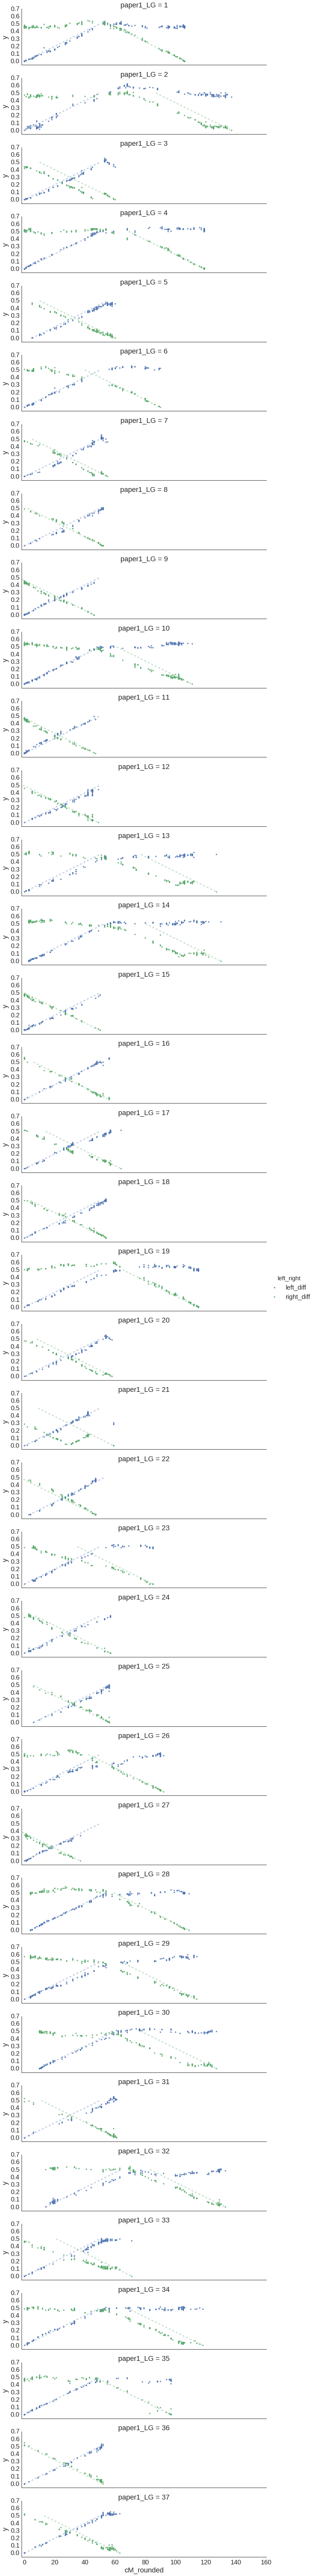

In [46]:
g = sns.lmplot(data = to_plot_melted, x = 'cM_rounded', y = 'y', row = 'paper1_LG', hue= 'left_right', 
               fit_reg = False, logistic = False,
               size = 3, aspect = 4, 
               sharex = True, x_jitter = 0)
g.set(ylim=(-.05, .7), xlim=(-2))

#g.map(plt.plot, x = , y = , linestyle='-')
#g.axes[0][0].plot([0, 50 ], [.0, .5], 'k--')

for idx, ax in enumerate(g.axes.ravel()):
    xstart = to_plot_melted.groupby('paper1_LG')['cM_rounded'].min().iloc[idx]
    xend = to_plot_melted.groupby('paper1_LG')['cM_rounded'].max().iloc[idx]
    
    ax.plot([xstart, xstart+50], [.0, .5], 'k--', alpha = .3, lw = 4, c = sns.color_palette()[0])
    ax.plot([xend-50, xend ], [.5, .0], 'k--', alpha = .3, lw = 4, c = sns.color_palette()[1])
    #ax.plot([0, 50 ], [.5, .0], 'k--', alpha = .5, lw = 2, c = sns.color_palette()[1])

sns.despine()
plt.savefig(os.path.join('paper', 'figures', 'supplemental', 'recombination_landscape.fam_08.png'), dpi = 200)
plt.show()


## Centromere placement notes:
    1: metacentric
    2: metacentric
    3: acrocentric?? -- possible ordering issue
    4: metacentric
    5: acrocentric
    6: metacentic???
    7: acrocentric
    8: acrocentic
    9: acrocentric
    10: metacentric
    11: acrocentric
    12: acrocentic
    13: metacentric
    14: metacentric
    15: acrocentic
    16: acrocentic
    17: acrocentic
    18: acrocentic
    19: metacentric
    20: acrocentric? - small p arm? what end is the centromere on?
    21: acrocentric - possible ordering issue
    22: acrocentric
    23: metacentric - ancestral homeologs with 28? - single link
    24: acrocentric
    25: acrocentric
    26: metacentric
    27: acrocentric
    28: metacentric
    29: metacentric
    30: metacentric
    31: acrocentric??
    32: metacentric
    33: acrocentric
    34: metacentric
    35: metacentric
    36: acrocentric
    37: acrocentric? - aslo a homeolog
    
    



## Phasing is not working well
much beter in fam_08 than in the other two

varrying success across chromosomes (2 vs 32 vs 1)


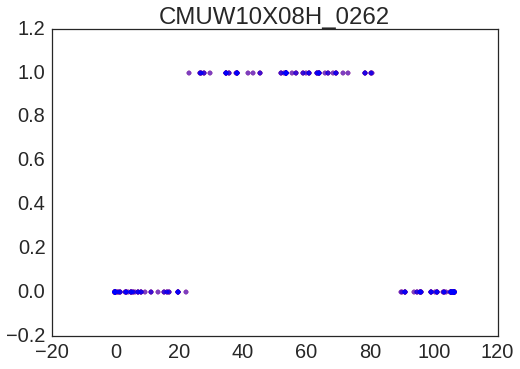

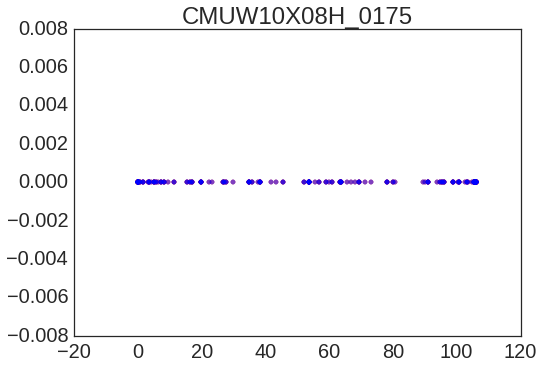

In [27]:
to_plot_fam = melted_phased[melted_phased['family']=='fam_08']

for xx in list(set(to_plot_fam['ind']))[6:8]:
    to_plot_LG = to_plot_fam[to_plot_fam['paper1_LG']==1].dropna(subset = ['phase'])
    to_plot = to_plot_LG[to_plot_LG['ind'] == xx]
    plt.scatter(to_plot['cM'], to_plot['right_diff'], color = 'red', alpha = .5)
    plt.scatter(to_plot['cM'], to_plot['left_diff'], color = 'blue', alpha = .5)
    plt.title(xx)
    plt.show()

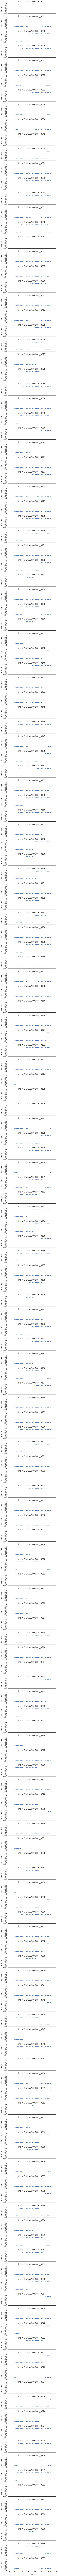

In [28]:
to_plot = melted_phased[melted_phased['paper1_LG']==1].dropna(subset = ['phase'])
#to_plot = to_plot[to_plot['ind'] == 'CMUW10X08H_0012']
sns.lmplot(data = to_plot, x= 'cM', y = 'left_diff', row = 'ind', fit_reg = False, size = 2, aspect = 4)

## round to the nearest cM

In [29]:
melted_phased['cM_rounded'] = np.rint(melted_phased['cM']).astype(np.int)

In [30]:
melted_phased.tail(50)

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  paper1_LG  \
771700  c79231        79231_A         58357   58357_36    11467         37   
771701  c53645        53645_A         37234   37234_17     6644         37   
771702  c56713        56713_B         39842   39842_20     7344         37   
771703  c26090        26090_A         14009   14009_61     2460         37   
771704  c66455        66455_A         48017   48017_61     9455         37   
771705  c69372        69372_A         50397   50397_57     9930         37   
771706  c73401          73401         53654   53654_11    10582         37   
771707  c61810        61810_A         44175   44175_57     8506         37   
771708    c404          404_A         26076   26076_80     4086         37   
771709  c41546        41546_A         26952   26952_61     4276         37   
771710  c26801        26801_A         14601   14601_71     2570         37   
771711  c42073        42073_B         27407    27407_8     4382         37   
771712  c54315        54315_A         37803   37803_59     6786         37   
771713  c43104        43104_A         28269   28269_67     4579         37   
771714   c6532         6532_B         47072   47072_31     9239         37   
771715  c16812        16812_A          6019    6019_54     1203         37   
771716  c56629        56629_A         39767   39767_34     7324         37   
771717  c14799        14799_B          4231    4231_23      890         37   
771718  c43228        43228_A         28376   28376_21     4614         37   
771719  c46003        46003_A         30751   30751_46     5150         37   
771720  c54786        54786_A         38207    38207_8     6908         37   
771721  c55155        55155_A         38527   38527_10     6998         37   
771722  c38594        38594_A         24535   24535_44     3867         37   
771723   c8016         8016_A         59177   59177_14    11516         37   
771724  c42871        42871_A         28079   28079_91     4535         37   
771725  c56853        56853_B         39954    39954_8     7372         37   
771726  c56969        56969_A         40044   40044_80     7400         37   
771727  c65832        65832_A         47500   47500_19     9356         37   
771728  c20536        20536_A          9297     9297_7     1763         37   
771729  c48742        48742_A         33075   33075_88     5679         37   
771730  c63000        63000_A         45150   45150_34     8747         37   
771731  c53082        53082_A         36765   36765_45     6503         37   
771732  c73242        73242_A         53518   53518_24    10551         37   
771733  c35991        35991_A         22373   22373_82     3599         37   
771734  c43958        43958_B         29006   29006_10     4776         37   
771735  c56543        56543_A         39691   39691_27     7305         37   
771736   c1859         1859_A          7589    7589_41     1471         37   
771737   c9226         9226_A         67173   67173_64    11910         37   
771738  c10381        10381_A           340     340_33       87         37   
771739  c58583          58583         41447   41447_61     7786         37   
771740  c55615        55615_A         38908   38908_23     7120         37   
771741   c4925         4925_A         33528   33528_26     5785         37   
771742  c58067        58067_B         40988   40988_33     7665         37   
771743  c43515        43515_A         28630   28630_58     4678         37   
771744  c40302        40302_A         25915   25915_85     4052         37   
771745  c10892        10892_A           805     805_81      187         37   
771746  c31254        31254_A         18371   18371_23     3096         37   
771747  c63247        63247_A         45354   45354_46     8807         37   
771748  c26097        26097_A         14015   14015_80     2462         37   
771749  c14930        14930_A          4352    4352_45      914         37   

           cM  value  family 

In [31]:
binned_phase = melted_phased.groupby(['LEP_LG', 'cM_rounded','LEPname', 'family', 'ind']).agg({'left_diff': lambda x : np.nanmean(x), 
                                                                                              'right_diff': lambda x : np.nanmean(x)})

KeyError: 'LEP_LG'

In [ ]:
binned_phase = binned_phase.reset_index()

In [ ]:
binned_phase.head()

In [ ]:
sns.lmplot(data = binned_phase, x= 'cM_rounded', y = 'left_diff', col = 'family', row = 'LEP_LG',
           fit_reg = False, size = 3, aspect = 2)

In [ ]:
def get_left_phase(x):
    x = x.dropna()
    return (np.mean(x))

In [ ]:
left_phase

In [ ]:
first_phase

In [ ]:
binned_phase = binned_phase.reset_index()

In [ ]:
binned_phase.head()

In [ ]:
sns.lmplot(data = binned_phase, x= 'cM_rounded', y = 'value', row = 'ind', col = 'LEP_LG',
           fit_reg = False, size = 3, aspect = 2)

In [ ]:
 melted.pivot(index = 'LEPname', columns = 'ind', values = 'value')